**IMPORTING THE NECESSARY LIBRARIES**

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

**LOAD THE DATASET**

In [2]:
#reading the data
data=pd.read_csv('cleaned_loan.csv')

In [3]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
#shape of the data
data.shape

(4368, 78)

In [5]:
#first five rows of the data
data.head()

,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,employment_status_clients,creationdate_dow,additional_charges,...,bank_name_clients_Keystone Bank,bank_name_clients_Skye Bank,bank_name_clients_Stanbic IBTC,bank_name_clients_Standard Chartered,bank_name_clients_Sterling Bank,bank_name_clients_UBA,bank_name_clients_Union Bank,bank_name_clients_Unity Bank,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank
0,12.0,30000.0,34500.0,30.0,0.0,3.432010,6.433055,0.0,1.0,4500.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,15000.0,17250.0,30.0,1.0,3.885298,7.320700,0.0,2.0,2250.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,20000.0,22250.0,15.0,0.0,11.139350,10.292041,0.0,3.0,2250.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,10000.0,11500.0,15.0,1.0,3.985770,7.491708,0.0,3.0,1500.0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,40000.0,44000.0,30.0,0.0,7.457913,9.076574,0.0,0.0,4000.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#checking missing values in the data
data.isnull().sum()

loannumber                       0
loanamount                       0
totaldue                         0
termdays                         0
bank_account_type                0
                                ..
bank_name_clients_UBA            0
bank_name_clients_Union Bank     0
bank_name_clients_Unity Bank     0
bank_name_clients_Wema Bank      0
bank_name_clients_Zenith Bank    0
Length: 78, dtype: int64

In [7]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

In [8]:
#creating validation set from training set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify=y, test_size=0.15)

In [9]:
#Scalig the train,validation and testing datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

**MODEL**

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier(random_state=101)

In [12]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

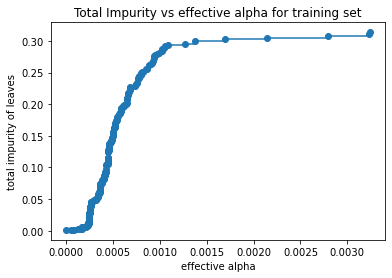

In [14]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.02696729428336897


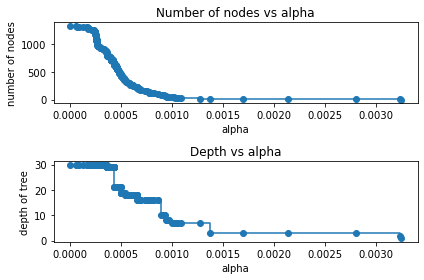

In [16]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [17]:
train_f1=[]
test_f1=[]
for clf in clfs:
    predict_train=clf.predict(X_train)
    f1_train=f1_score(y_train,predict_train)
    train_f1.append(f1_train)
    predict_test=clf.predict(X_test)
    f1_test=f1_score(y_test,predict_test)
    test_f1.append(f1_test)
    

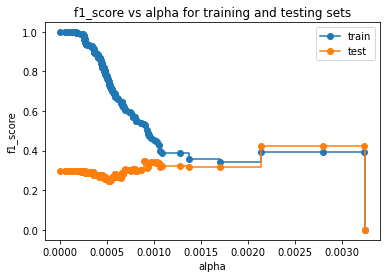

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("f1_score")
ax.set_title("f1_score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_f1, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_f1, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [19]:
clf_check= DecisionTreeClassifier(random_state=100, ccp_alpha=0.0025)
clf_check.fit(X_train, y_train)
pred_check_train=clf_check.predict(X_train)
f1_check_train=f1_score(pred_check_train,y_train)
pred_check_test=clf_check.predict(X_test)
f1_check_test=f1_score(pred_check_test,y_test)

In [20]:
f1_check_test,f1_check_train

(0.4225352112676056, 0.39529411764705885)